In [205]:
!pip install scikit-learn scipy matplotlib
!pip install tensorflow
!pip install seaborn

In [206]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 

In [207]:
%pwd
%cd E:\altaf

E:\altaf


In [208]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
STEPS = 100
LR = 1e-3
default_image_size = tuple((256, 256))
image_size = 0
directory_root = 'E:\\altaf\\plant\\Plant_leaf_diseases_dataset_with_augmentation\\Plant_leave_diseases_dataset_with_augmentation'
width=256
height=256
depth=3

In [209]:
# for trained dataset
directory_names = []
image_list = []
try:
    print("[INFO] Loading images ...")
    image_dirs = listdir(directory_root)
    for dir_path in image_dirs :
        if not dir_path.startswith(".DS_Store") :
            plant_disease_dirs = listdir(f"{directory_root}/{dir_path}")
            image_counts = 0
            for disease_dir in plant_disease_dirs :
                if not disease_dir.startswith(".DS_Store") :
                    plant_image = (f"{directory_root}/{dir_path}/{disease_dir}")
                    if plant_image.endswith(".jpg") == True or plant_image.endswith(".JPG") == True:
                        image_counts+=1
            image_list.append(image_counts) 
            directory_names.append(dir_path)        

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Image loading completed


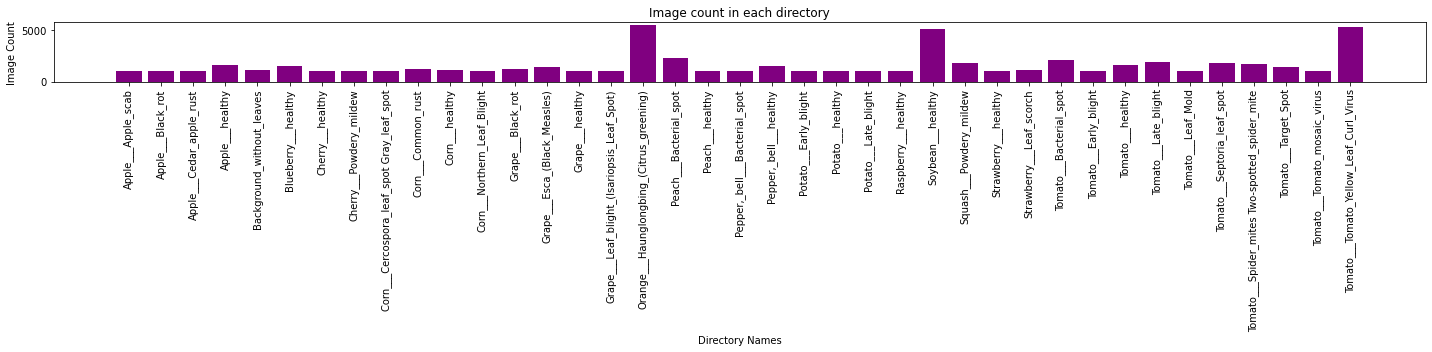

In [210]:
plt.figure(figsize=(20, 5))
plt.bar(directory_names, image_list, color='purple')
plt.title("Image count in each directory")
plt.xlabel("Directory Names")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

[INFO] Loading images ...
Error : [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'E:\x07ltaf\\plant\\Plant_leave_diseases_dataset_with_augmentation_all'


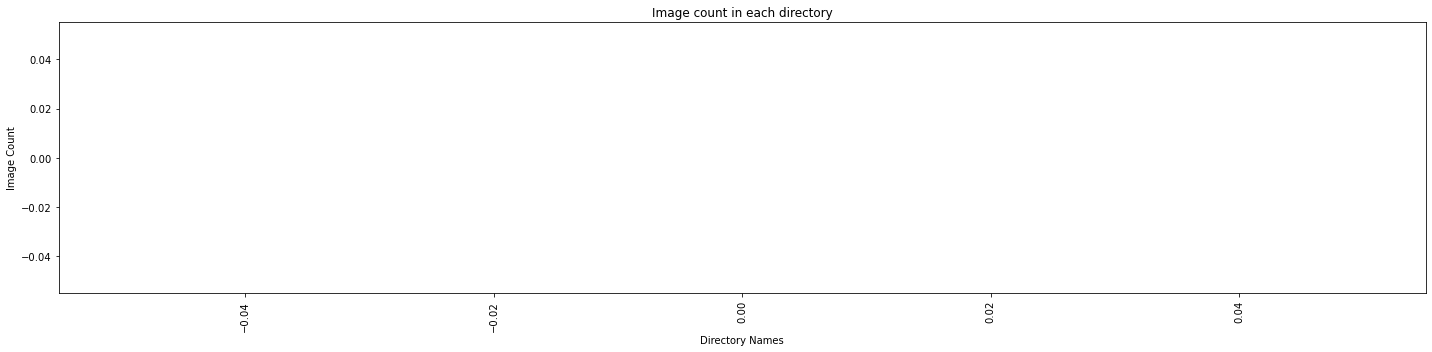

In [211]:
# for entire augumented dataset
augumented_dir = 'E:\altaf\plant\Plant_leave_diseases_dataset_with_augmentation_all'
directory_names = []
image_list = []
try:
    print("[INFO] Loading images ...")
    image_dirs = listdir(augumented_dir)
    for dir_path in image_dirs :
        if not dir_path.startswith(".DS_Store") :
            plant_disease_dirs = listdir(f"{augumented_dir}/{dir_path}")
            image_counts = 0
            for disease_dir in plant_disease_dirs :
                if not disease_dir.startswith(".DS_Store") :
                    plant_image = (f"{augumented_dir}/{dir_path}/{disease_dir}")
                    if plant_image.endswith(".jpg") == True or plant_image.endswith(".JPG") == True:
                        image_counts+=1
            image_list.append(image_counts) 
            directory_names.append(dir_path)        

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

plt.figure(figsize=(20, 5))
plt.bar(directory_names, image_list, color='purple')
plt.title("Image count in each directory")
plt.xlabel("Directory Names")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

[INFO] Loading images ...
[INFO] Image loading completed


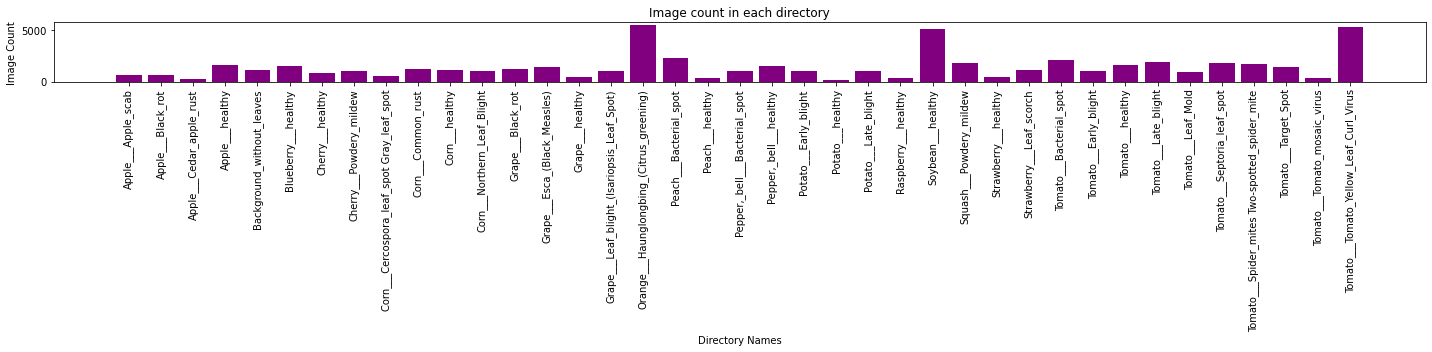

In [212]:
# for entire non augumented dataset
non_augumented_dir = 'E:\\altaf\\plant\\Plant_leaf_diseases_dataset_without_augmentation\\Plant_leave_diseases_dataset_without_augmentation'
directory_names = []
image_list = []
try:
    print("[INFO] Loading images ...")
    image_dirs = listdir(non_augumented_dir)
    for dir_path in image_dirs :
        if not dir_path.startswith(".DS_Store") :
            plant_disease_dirs = listdir(f"{non_augumented_dir}/{dir_path}")
            image_counts = 0
            for disease_dir in plant_disease_dirs :
                if not disease_dir.startswith(".DS_Store") :
                    plant_image = (f"{non_augumented_dir}/{dir_path}/{disease_dir}")
                    if plant_image.endswith(".jpg") == True or plant_image.endswith(".JPG") == True:
                        image_counts+=1
            image_list.append(image_counts) 
            directory_names.append(dir_path)        

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

plt.figure(figsize=(20, 5))
plt.bar(directory_names, image_list, color='purple')
plt.title("Image count in each directory")
plt.xlabel("Directory Names")
plt.ylabel("Image Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [213]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [214]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for plant_folder in root_dir :
        if not plant_folder.startswith(".DS_Store") :
            plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
            for disease_folder in plant_disease_folder_list :
                if not disease_folder.startswith(".DS_Store") :
                    plant_image = (f"{directory_root}/{plant_folder}/{disease_folder}")
                    if plant_image.endswith(".jpg") == True or plant_image.endswith(".JPG") == True:
                        image_list.append(convert_image_to_array(plant_image))
                        label_list.append(plant_folder)         

    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Image loading completed


In [215]:
len(image_list)

61484

In [216]:
len(label_list)

61484

In [217]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [218]:
print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Background_without_leaves' 'Blueberry___healthy'
 'Cherry___Powdery_mildew' 'Cherry___healthy'
 'Corn___Cercospora_leaf_spot Gray_leaf_spot' 'Corn___Common_rust'
 'Corn___Northern_Leaf_Blight' 'Corn___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus' 'Tomato___Tom

In [219]:
np_image_list = np.array(image_list, dtype=np.float16) / 255.0

In [220]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, 
                             fill_mode="nearest")

In [221]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [222]:
x_train.shape

(49187, 256, 256, 3)

In [223]:
y_train.shape

(49187, 39)

In [224]:
x_test.shape

(12297, 256, 256, 3)

In [225]:
y_test.shape

(12297, 39)

In [226]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [227]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
activation_57 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_58 (Activation)   (None, 85, 85, 64)        0         
__________

In [228]:
#opt = Adam(learning_rate=0.0001)
opt = Adam(lr=LR, decay=LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [229]:
#history = model.fit(
print("[INFO] Training network...")
history = model.fit_generator(augment.flow(x_train, y_train, batch_size=BS),
                              validation_data=(x_test, y_test),
                              steps_per_epoch=len(x_train) // BS,
                              epochs=EPOCHS, 
                              verbose=1)

[INFO] Training network...
Epoch 1/25
1537/1537 [==============================] - 21336s 14s/step - loss: 1.2734 - acc: 0.6469 - val_loss: 0.7104 - val_acc: 0.7952
Epoch 2/25
1537/1537 [==============================] - 21438s 14s/step - loss: 0.5743 - acc: 0.8227 - val_loss: 0.5172 - val_acc: 0.8543
Epoch 3/25
1537/1537 [==============================] - 21065s 14s/step - loss: 0.4158 - acc: 0.8703 - val_loss: 1.9304 - val_acc: 0.6681
Epoch 4/25
1537/1537 [==============================] - 21133s 14s/step - loss: 0.3092 - acc: 0.9017 - val_loss: 1.0829 - val_acc: 0.7516
Epoch 5/25
1537/1537 [==============================] - 21154s 14s/step - loss: 0.3007 - acc: 0.9068 - val_loss: 0.1595 - val_acc: 0.9497
Epoch 6/25
1537/1537 [==============================] - 21161s 14s/step - loss: 0.2256 - acc: 0.9278 - val_loss: 0.3812 - val_acc: 0.9047
Epoch 7/25
1537/1537 [==============================] - 21085s 14s/step - loss: 0.1926 - acc: 0.9373 - val_loss: 0.1612 - val_acc: 0.9523
Epoch 8

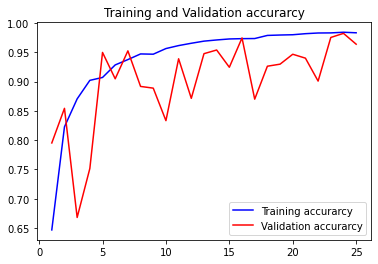

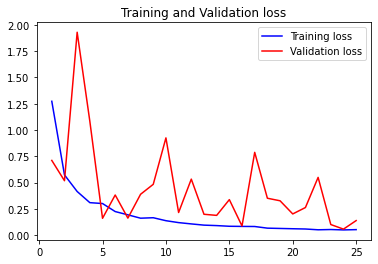

In [231]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

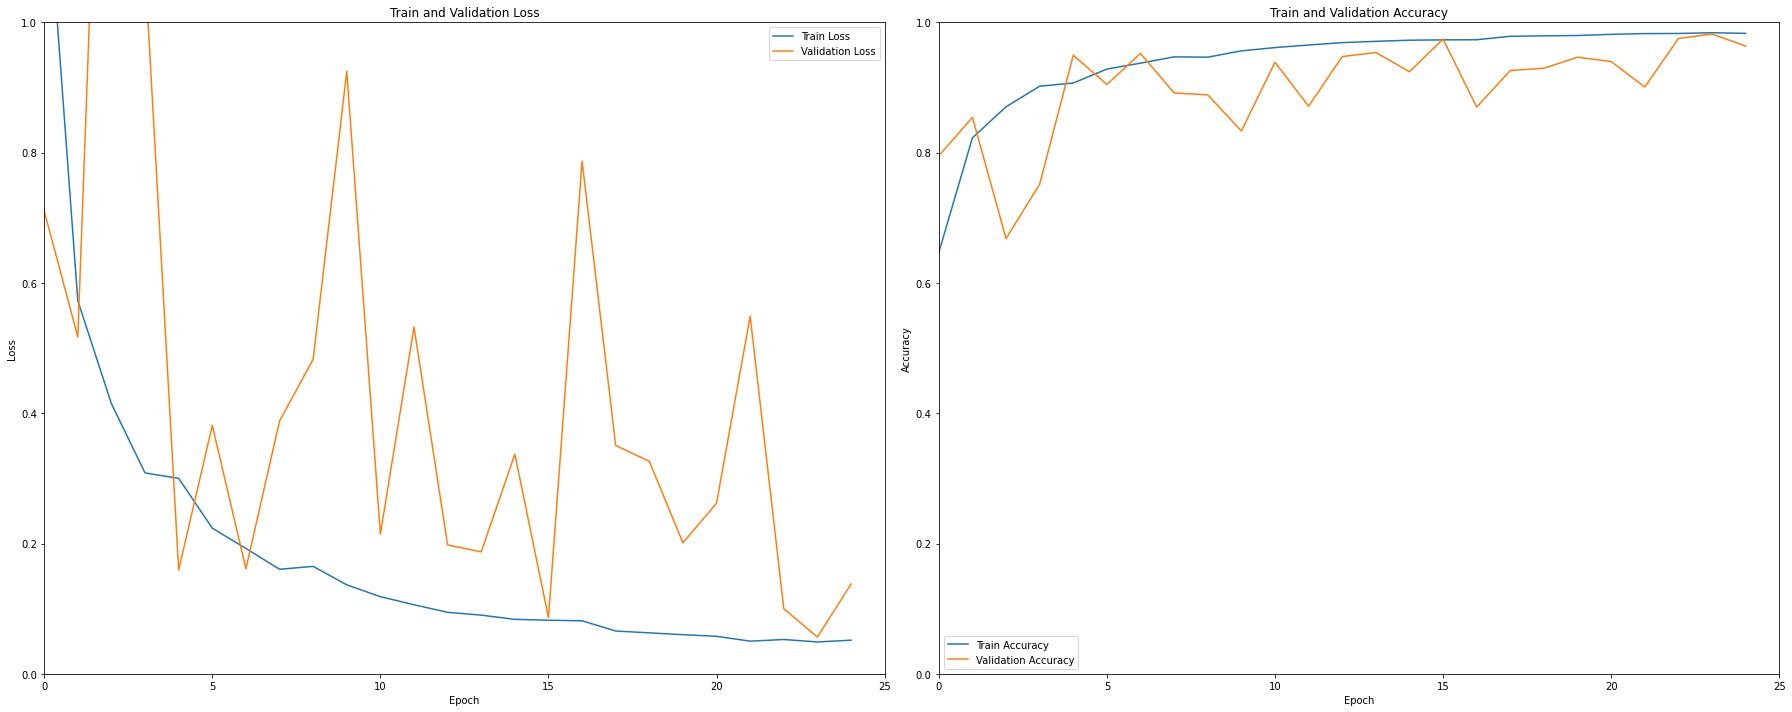

In [233]:
plt.figure(figsize = (25,10))
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 25)
plt.ylim(0.0,1.0)
plt.legend()

plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label="Train Accuracy")
plt.plot(history.history['val_acc'], label="Validation Accuracy")
plt.xlim(0, 25)
plt.ylim(0.0,1.0)
plt.legend()
plt.tight_layout()

In [234]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
12297/12297 [==============================] - 1278s 104ms/step
Test Accuracy: 96.37309912986908


In [235]:
print("[INFO] Saving model...")
model.save('cnn_model_v3.h5')

[INFO] Saving model...


In [236]:

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test2 = np.argmax(y_test,axis=1)

cm = confusion_matrix(y_test2,pred)
np.set_printoptions(precision=2)
print(cm)
plt.figure()

[[ 190    2    0 ...    0    0    1]
 [   0  202    0 ...    0    0    0]
 [   0    0  188 ...    0    0    0]
 ...
 [   0    0    0 ... 1016    0    0]
 [   0    0    0 ...    0  187    1]
 [   0    0    0 ...    0    0  331]]


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (39).

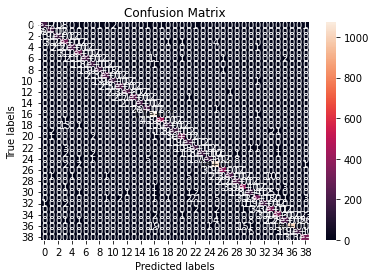

In [237]:


ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(label_binarizer.classes_,rotation=90); ax.yaxis.set_ticklabels(label_binarizer.classes_,rotation=0);